In [29]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
def analyse(data,question,val):
    answer = {}
    Nanswer = {}
    ratio = 0
    if data['logs'] == [] :
        user = "unknow"
    else :
        user = data['logs'][0]['IDuser']
    root =  data['quests'][0]["dataquestionnaire"]
    for index,element in enumerate(root):
        title = element['code']

        if "value" in element and element["answered"] == "true":
            print(user)
            if title in val :
                val[title][user] = element['value']
            else : 
                val[title] = {}
                val[title][user] = element['value']


        if element['code'] in question :
            question[title] +=1
        else :
            question[title] = 1

        if 'required' in element :
            ratio += 1
            answer[index] = element

        else : 
            Nanswer[index] = element
    ratio = ratio/len(root)
    return answer,Nanswer,ratio,question,val


In [31]:
files = os.listdir("json")
list_ratio  = []
question = {}
val = {}
for file in files :
    #print(file)
    with open("json/{}".format(file), 'r') as f:
        datastore = json.load(f)
        if "quests" in datastore :
            if datastore["quests"] != []:
                answer,Nanswer,ratio,question,val = analyse(datastore,question,val)
                list_ratio.append(ratio)
                #print("answer : ",answer.keys())
                #print("No answer : ",Nanswer.keys())
                #print("ratio : ",ratio)
        #print("*"*8)

'tristesse un grand vide un enorme gachid', 'lwd02': 'cest normal mais deception et culpabilisation due a ces absences', 'myg07': 'Fatalité', 'ced06': 'Que le sommeil est difficile à retrouver ', 'mrp34': 'Je peux faire plein de choses incroyables', 'lhn11': 'Rien ', 'mdp03': "Je vais demander une curatelle ou une mesure de protection a mon assistante sociale, je me dis que j'ai ete irresponsable et que maintenant je veux etre responsable et assumer", 'mml45': 'Je suis partie avec mon compagnon pour aller faire quelque chose de plaisant pour moi, boire une boisson chaude', 'msc39': 'Je vais essayer de faire de mon mieux\n', 'mim42': 'Jai plus envie de continuer a lutter', 'lbk01': "Je sais que ce moment sera éphémère, mais qu'il peut se répéter... à minima si j'y crois et m'emploie à ce qu'il puisse se reproduire.... sentiment de ne pas me cacher, de ne pas faire de faux semblants.\nCe n'est pas evident, parfois coûteux mais pour une conséquence/charge supportable, agréable.", 'mpc11':

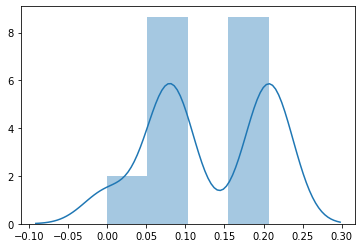

In [32]:
ax = sns.distplot(list_ratio)

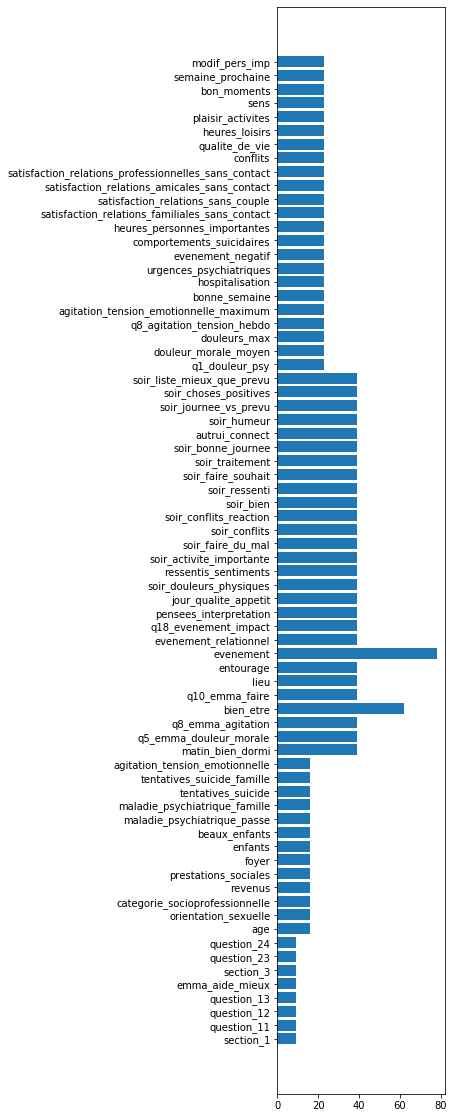

In [33]:
plt.figure(figsize=(3, 20)) 
plt.barh(*zip(*question.items()))
plt.show()

In [34]:
val

{'age': {'mgl33': '18',
  'mpm50': '23',
  'mpv08': '48',
  'mka30': '31',
  'unknow': '18',
  'mls35': '25',
  'mpm38': '58',
  'ccm11': '20',
  'cbc08': '43',
  'mgc21': '34',
  'mmk24': '50',
  'mcc57': '22',
  'mmg52': '24',
  'ldi16': '18',
  'lej14': '37'},
 'agitation_tension_emotionnelle': {'mgl33': 5,
  'mpm50': 8,
  'mpv08': 3,
  'mka30': 8,
  'unknow': 6,
  'mls35': 10,
  'mpm38': 4,
  'ccm11': 4,
  'cbc08': 5,
  'mgc21': 5,
  'mmk24': 7,
  'mcc57': 7,
  'mmg52': 7,
  'ldi16': 5,
  'lej14': 7},
 'q5_emma_douleur_morale': {'lmi13': 9,
  'lwd02': 4,
  'mcd13': 3,
  'myg07': 2,
  'ced06': 2,
  'mrp34': 1,
  'lgf18': 1,
  'lhn11': 6,
  'mdp03': 7,
  'mml45': 3,
  'msc39': 6,
  'mim42': 9,
  'lbk01': 2,
  'mpc11': 3,
  'lrb12': 4,
  'mlj09': 1,
  'mfc55': 4,
  'mmz01': 6,
  'mbe25': 6,
  'mpn58': 2,
  'mcl41': 1,
  'mcn02': 8,
  'mmo32': 0,
  'mty60': 1,
  'mcy15': 2,
  'mlm43': 0,
  'ccm03': 5,
  'mra54': 0,
  'mlv05': 10,
  'bmm01': 2,
  'lpj09': 6,
  'mlr17': 4,
  'bcc08': 1,


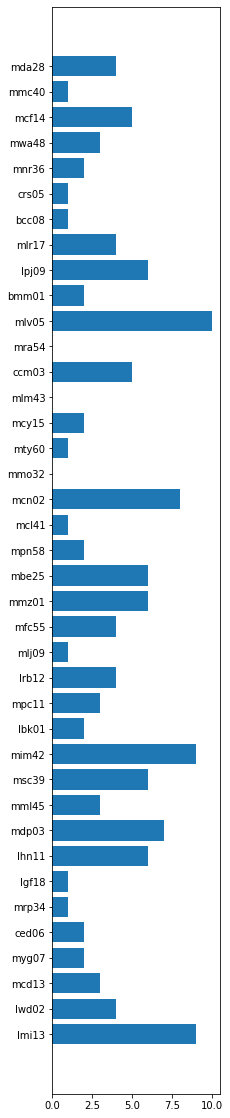

In [39]:
def check_values(subject):
    plt.figure(figsize=(3, 20)) 
    plt.barh(*zip(*val[subject].items()))
    plt.show()
check_values('q5_emma_douleur_morale')